In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set(style='dark')

## Basic Analytics 

### Identify product categories performance based on the number of orders

In [78]:
products_df = pd.read_csv("./data/products_dataset.csv")
product_category_name_translation_df = pd.read_csv("./data/product_category_name_translation.csv")

products_df = products_df.merge(product_category_name_translation_df, on="product_category_name")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [79]:
order_items_df = pd.read_csv("./data/order_items_dataset.csv")

order_items_df = order_items_df.merge(products_df, on="product_id")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [80]:
sum_order_items_df = order_items_df.groupby("product_category_name_english").order_id.nunique().sort_values(ascending=False).reset_index()
sum_order_items_df.rename(columns={
    "product_category_name_english": "product_category",
    "order_id": "order_count"
}, inplace=True)
sum_order_items_df.head(15)

,product_category,order_count
0,bed_bath_table,9417
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449
5,housewares,5884
6,watches_gifts,5624
7,telephony,4199
8,auto,3897
9,toys,3886


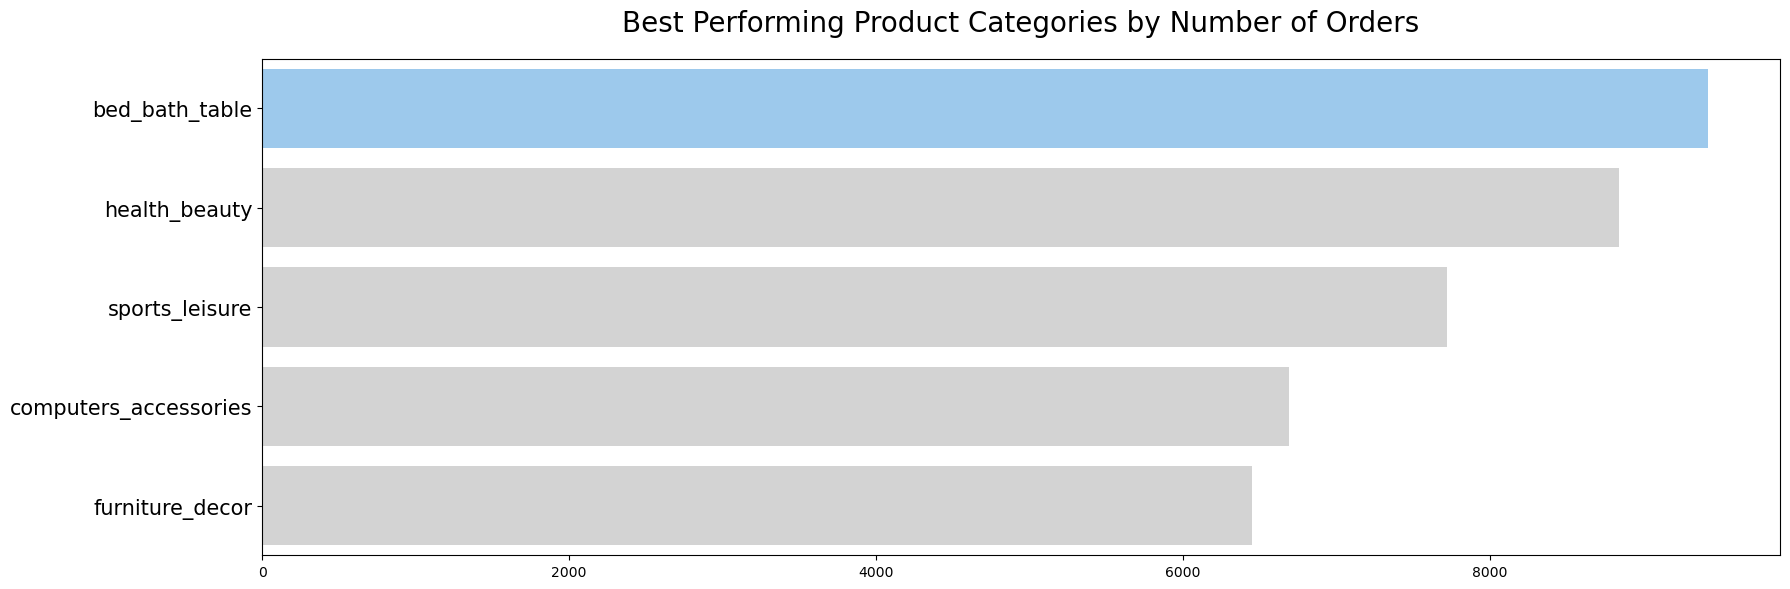

In [81]:
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(18, 6))
sns.barplot(x="order_count", y="product_category", data=sum_order_items_df.head(5), palette=colors)
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(fontsize=15)
plt.xticks(fontsize=10)
plt.title("Best Performing Product Categories by Number of Orders", loc="center", fontsize=20, pad=20)
plt.tight_layout()
plt.savefig("images/best-performing-1.png")
plt.show()

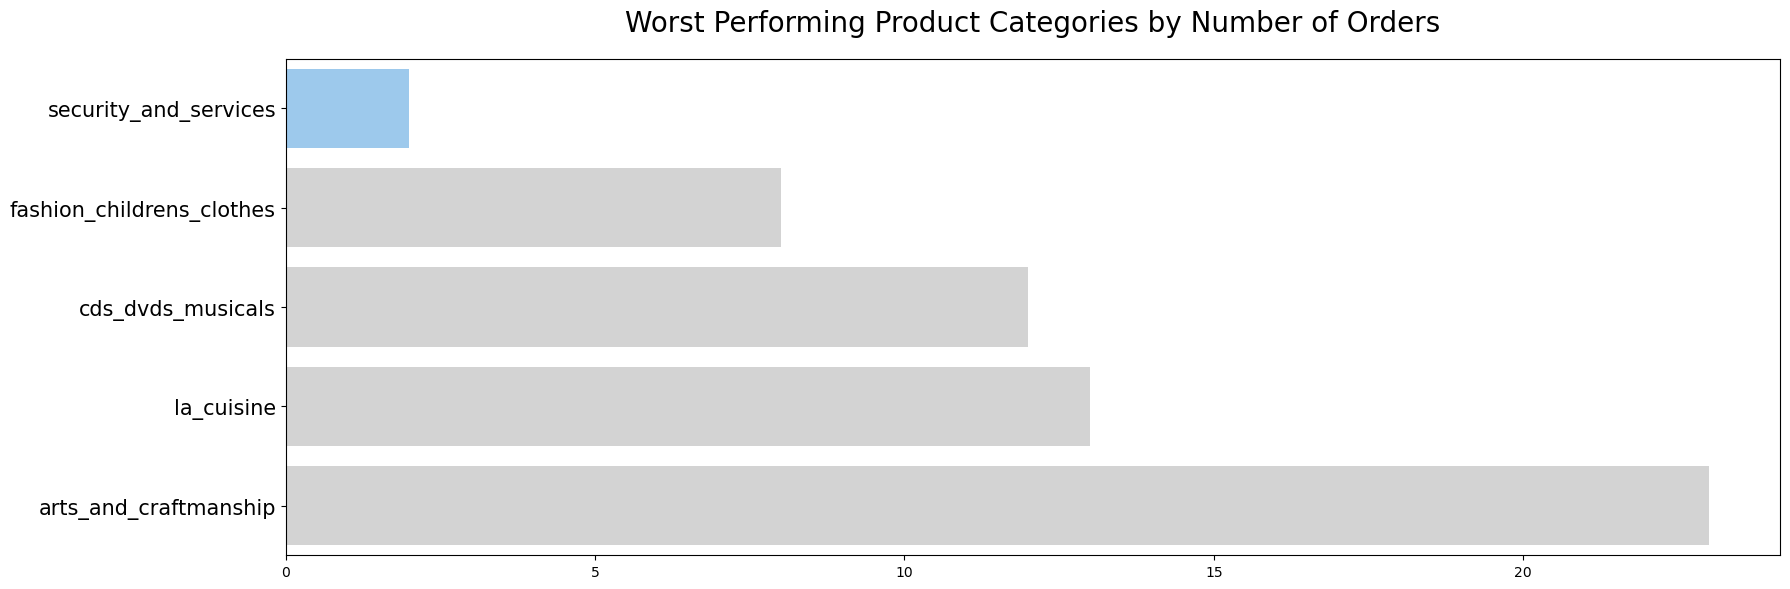

In [82]:
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(18, 6))
sns.barplot(x="order_count", y="product_category", data=sum_order_items_df.sort_values(by="order_count", ascending=True).head(5), palette=colors)
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(fontsize=15)
plt.xticks(fontsize=10)
plt.title("Worst Performing Product Categories by Number of Orders", loc="center", fontsize=20, pad=20)
plt.tight_layout()
plt.savefig("images/worst-performing-1.png")
plt.show()

### Identify product categories performance based on the customer's review score

In [83]:
order_reviews_df = pd.read_csv("./data/order_reviews_dataset.csv")

order_items_df = order_items_df.merge(order_reviews_df, on="order_id")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,cool_stuff,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,cool_stuff,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,cool_stuff,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,cool_stuff,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18


In [84]:
mean_review_score_df = order_items_df.groupby("product_category_name_english").review_score.mean().sort_values(ascending=False).reset_index()
mean_review_score_df.rename(columns={
    "product_category_name_english": "product_category",
    "review_score": "mean_review_score"
}, inplace=True)
mean_review_score_df.head()

,product_category,mean_review_score
0,cds_dvds_musicals,4.642857
1,fashion_childrens_clothes,4.500000
2,books_general_interest,4.446266
3,costruction_tools_tools,4.444444
4,flowers,4.419355


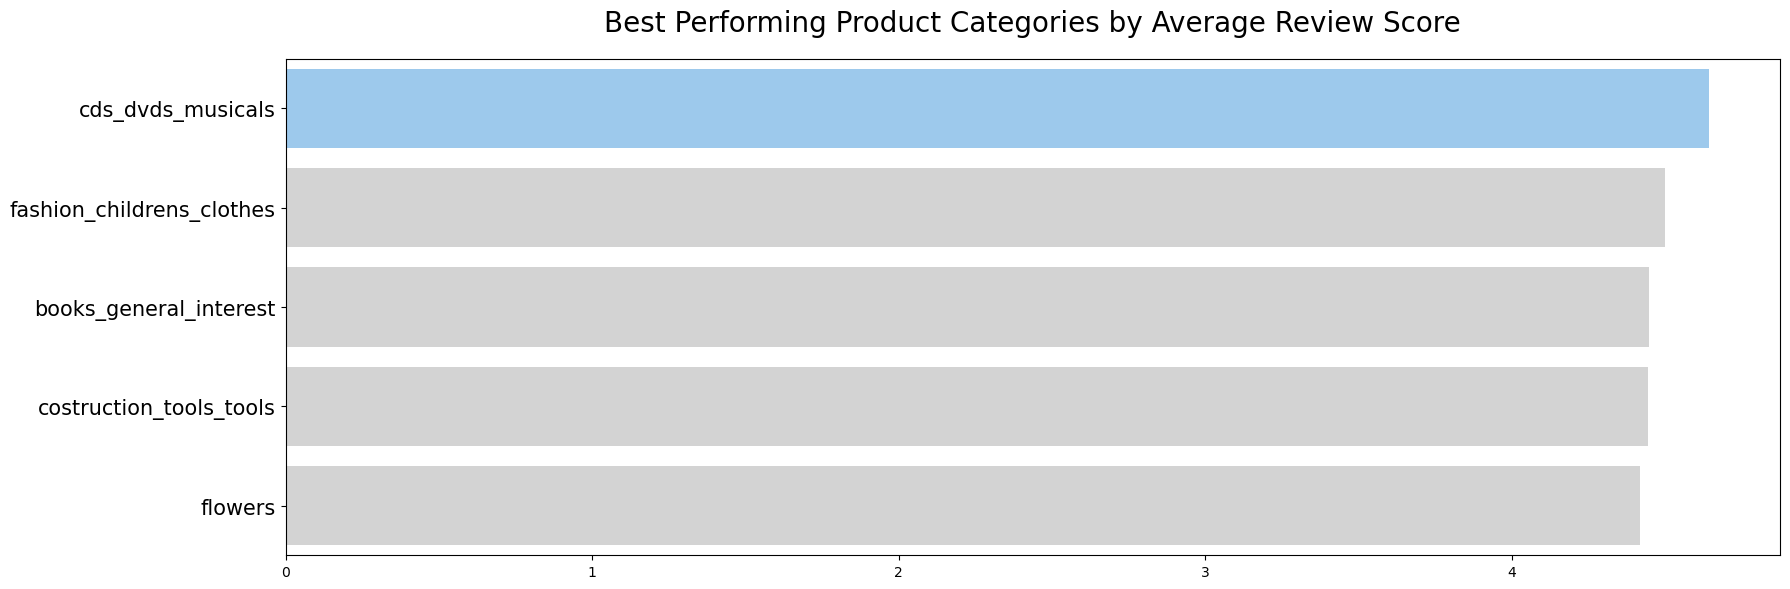

In [85]:
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(18, 6))
sns.barplot(x="mean_review_score", y="product_category", data=mean_review_score_df.head(5), palette=colors)
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(fontsize=15)
plt.xticks(fontsize=10)
plt.title("Best Performing Product Categories by Average Review Score", loc="center", fontsize=20, pad=20)
plt.tight_layout()
plt.savefig("images/best-performing-2.png")
plt.show()

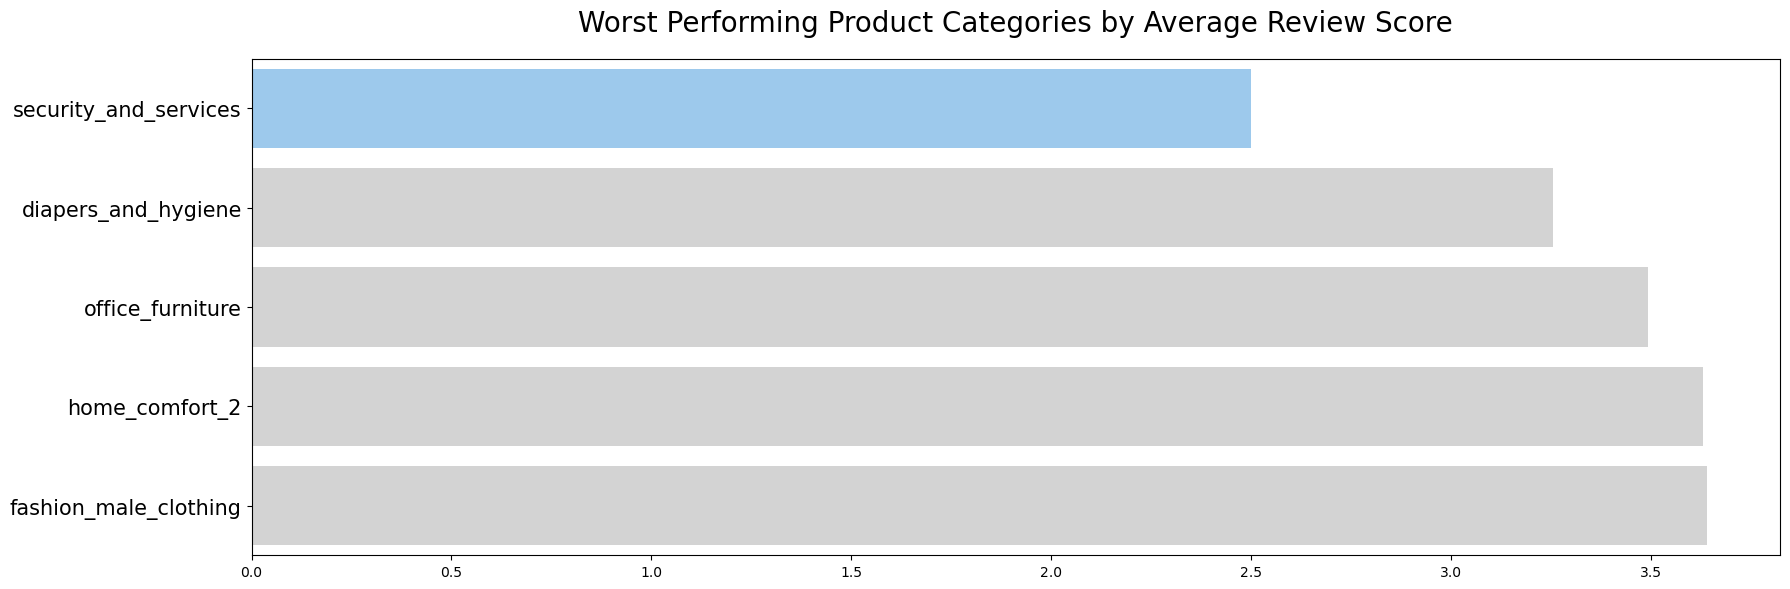

In [86]:
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(18, 6))
sns.barplot(x="mean_review_score", y="product_category", data=mean_review_score_df.sort_values(by="mean_review_score", ascending=True).head(5), palette=colors)
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(fontsize=15)
plt.xticks(fontsize=10)
plt.title("Worst Performing Product Categories by Average Review Score", loc="center", fontsize=20, pad=20)
plt.tight_layout()
plt.savefig("images/worst-performing-2.png")
plt.show()

### Identify the number of orders & total revenue per month

In [87]:
orders_df = pd.read_csv("./data/orders_dataset.csv")
order_payments_df = pd.read_csv("./data/order_payments_dataset.csv")

In [88]:
orders_df = orders_df[(orders_df["order_status"] == "delivered")].reset_index(drop=True)

In [89]:
orders_df = orders_df.merge(order_payments_df, on="order_id")

In [90]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12


In [91]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100756 entries, 0 to 100755
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       100756 non-null  object 
 1   customer_id                    100756 non-null  object 
 2   order_status                   100756 non-null  object 
 3   order_purchase_timestamp       100756 non-null  object 
 4   order_approved_at              100742 non-null  object 
 5   order_delivered_carrier_date   100754 non-null  object 
 6   order_delivered_customer_date  100748 non-null  object 
 7   order_estimated_delivery_date  100756 non-null  object 
 8   payment_sequential             100756 non-null  int64  
 9   payment_type                   100756 non-null  object 
 10  payment_installments           100756 non-null  int64  
 11  payment_value                  100756 non-null  float64
dtypes: float64(1), int64(2), objec

#### Fixing the data type

In [92]:
datetime_columns = [
    "order_purchase_timestamp", 
    "order_approved_at", 
    "order_delivered_carrier_date", 
    "order_delivered_customer_date", 
    "order_estimated_delivery_date"
]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [93]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100756 entries, 0 to 100755
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100756 non-null  object        
 1   customer_id                    100756 non-null  object        
 2   order_status                   100756 non-null  object        
 3   order_purchase_timestamp       100756 non-null  datetime64[ns]
 4   order_approved_at              100742 non-null  datetime64[ns]
 5   order_delivered_carrier_date   100754 non-null  datetime64[ns]
 6   order_delivered_customer_date  100748 non-null  datetime64[ns]
 7   order_estimated_delivery_date  100756 non-null  datetime64[ns]
 8   payment_sequential             100756 non-null  int64         
 9   payment_type                   100756 non-null  object        
 10  payment_installments           100756 non-null  int64         
 11  

In [94]:
monthly_orders_df = orders_df.resample('M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.sort_values(by="order_purchase_timestamp")
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

monthly_orders_df.head()

,order_purchase_timestamp,order_count,revenue
0,2016-10,265,46566.71
1,2016-11,0,0.00
2,2016-12,1,19.62
3,2017-01,750,127545.67
4,2017-02,1653,271298.65


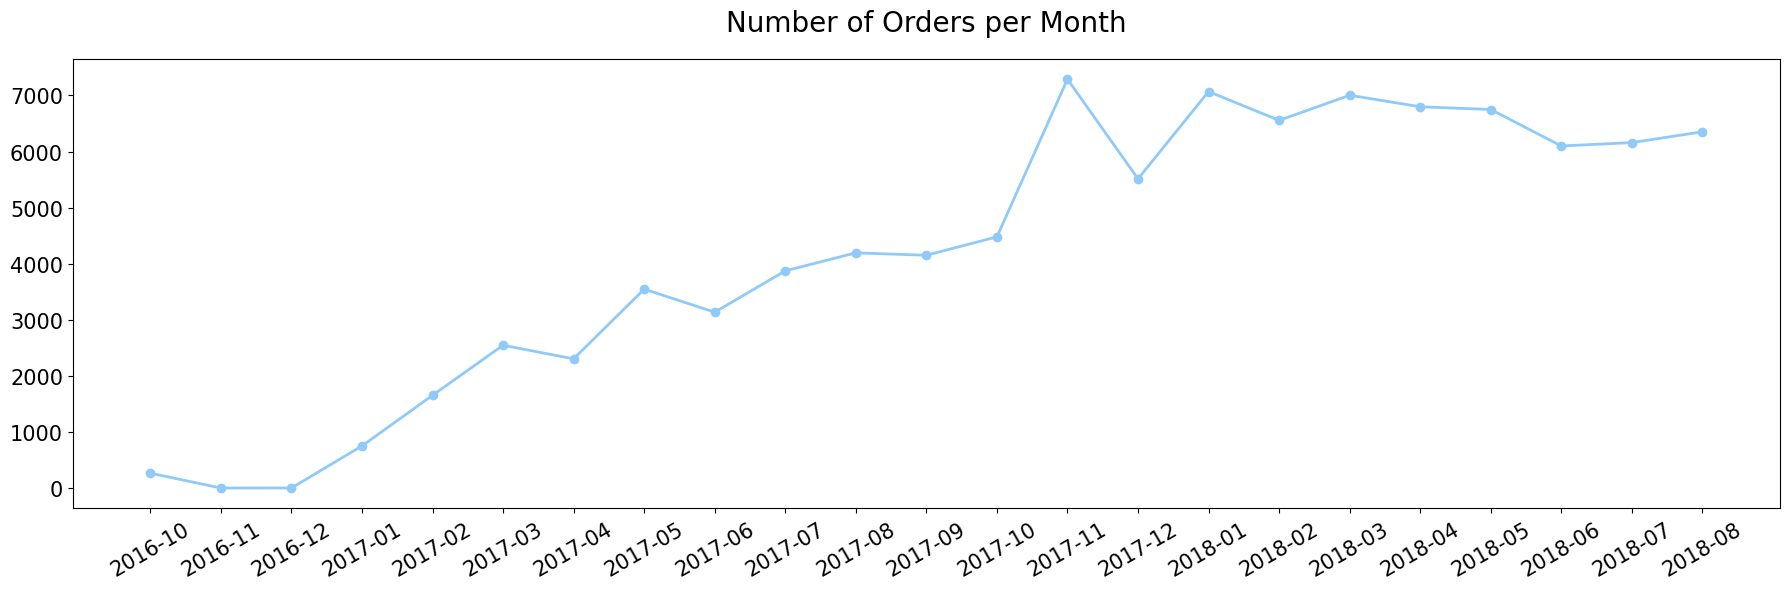

In [95]:
plt.figure(figsize=(18, 6))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["order_count"],
    marker='o', 
    linewidth=2,
    color="#90CAF9"
)
plt.title("Number of Orders per Month", loc="center", fontsize=20, pad=20)
labels, locations = plt.yticks()
plt.xticks(rotation=30,fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig("images/orders-per-month.png")
plt.show()

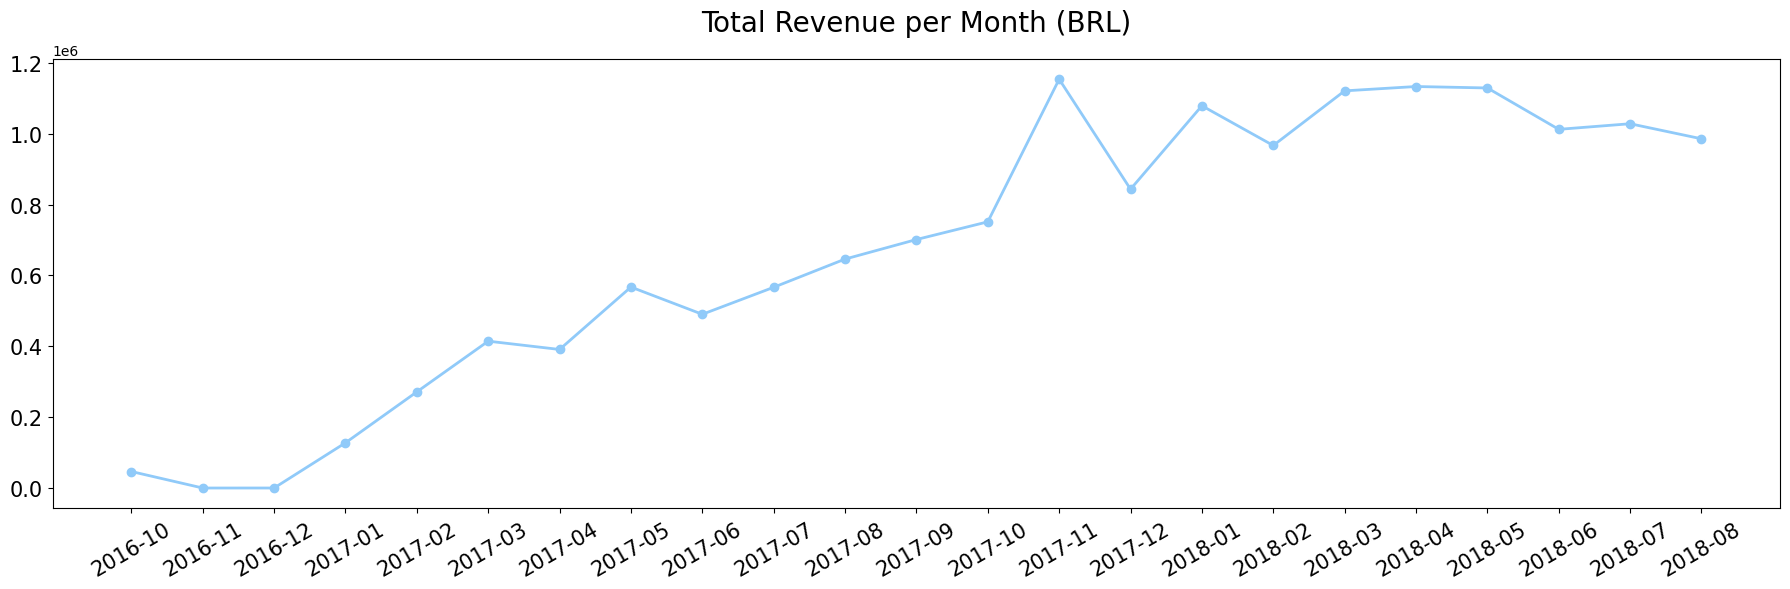

In [96]:
plt.figure(figsize=(18, 6))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["revenue"],
    marker='o', 
    linewidth=2,
    color="#90CAF9"
)
plt.title("Total Revenue per Month (BRL)", loc="center", fontsize=20, pad=20)
labels, locations = plt.yticks()
plt.xticks(rotation=30,fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig("images/revenue-per-month.png")
plt.show()

### Identify which cities are generating the highest revenue?

In [97]:
customers_df = pd.read_csv("./data/customers_dataset.csv")

In [98]:
new_orders_df = pd.merge(
    left=orders_df,
    right=customers_df,
    on="customer_id"
)
new_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [99]:
highest_orders_city_df = new_orders_df.groupby("customer_city").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(ascending=False, by="payment_value").reset_index()
highest_orders_city_df.columns = ["customer_city", "order_count", "revenue"]
highest_orders_city_df.head()

,customer_city,order_count,revenue
0,sao paulo,15045,2108162.22
1,rio de janeiro,6601,1111872.32
2,belo horizonte,2697,406050.87
3,brasilia,2071,345221.87
4,curitiba,1489,238582.26


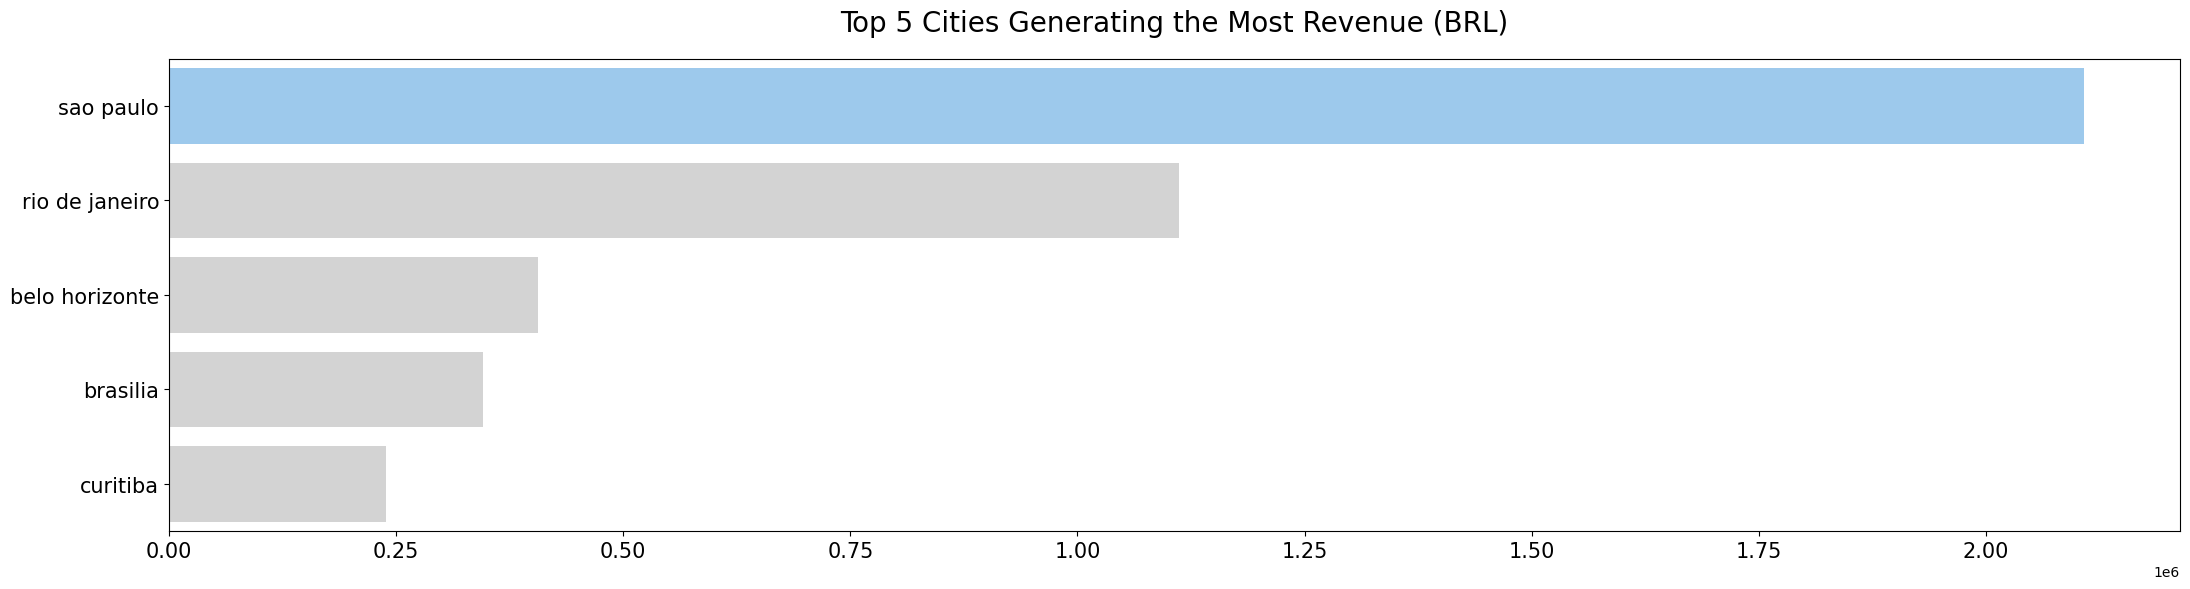

In [100]:
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(22, 6))
sns.barplot(x="revenue", y="customer_city", data=highest_orders_city_df.head(), palette=colors)
plt.xticks(fontsize=15)
plt.title("Top 5 Cities Generating the Most Revenue (BRL)", loc="center", fontsize=20, pad=20)
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.savefig("images/top-cities.png")
plt.show()

## RFM Analysis

RFM analysis is a marketing technique used to quantitatively rank and group customers based on their **recency**, **frequency**, and **monetary** to identify the best customers and perform targeted marketing campaigns.

* **Recency:** How recently has the customer made a transaction?
* **Frequency:** How often do customers order?
* **Monetary:** How much money have customers spent on products on this website/app?

In [101]:
rfm_df = new_orders_df.groupby("customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "payment_value": "sum"
})
rfm_df.columns = ["customer_unique_id", "max_order_purchase_timestamp", "frequency", "monetary"]
rfm_df["max_order_purchase_timestamp"] = rfm_df["max_order_purchase_timestamp"].dt.date
rfm_df.head()

,customer_unique_id,max_order_purchase_timestamp,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,196.89


In [102]:
recent_date = new_orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_purchase_timestamp"].apply(lambda x: (recent_date-x).days)
rfm_df.drop("max_order_purchase_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,114
2,0000f46a3911fa3c0805444483337064,1,86.22,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,321
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,288


In [103]:
rfm_df.describe()

,frequency,monetary,recency
count,93357.000000,93357.000000,93357.000000
mean,1.033420,165.198772,237.473783
std,0.209099,226.314579,152.587935
min,1.000000,9.590000,0.000000
25%,1.000000,63.060000,114.000000
50%,1.000000,107.780000,218.000000
75%,1.000000,182.560000,346.000000
max,15.000000,13664.080000,695.000000


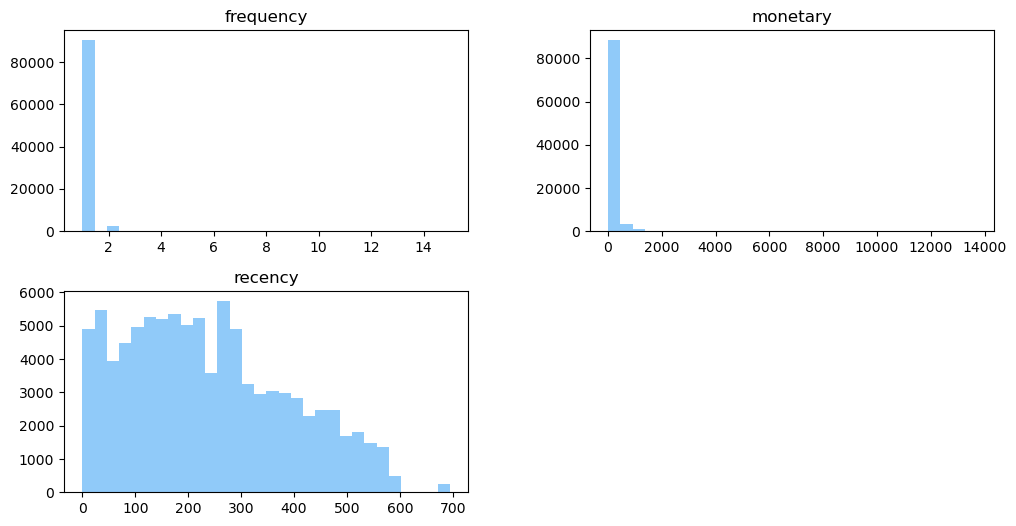

In [104]:
rfm_df.hist(bins=30, color="#90CAF9", figsize=(12, 6), grid=False)
plt.savefig("images/RFM-distribution.png")
plt.show()

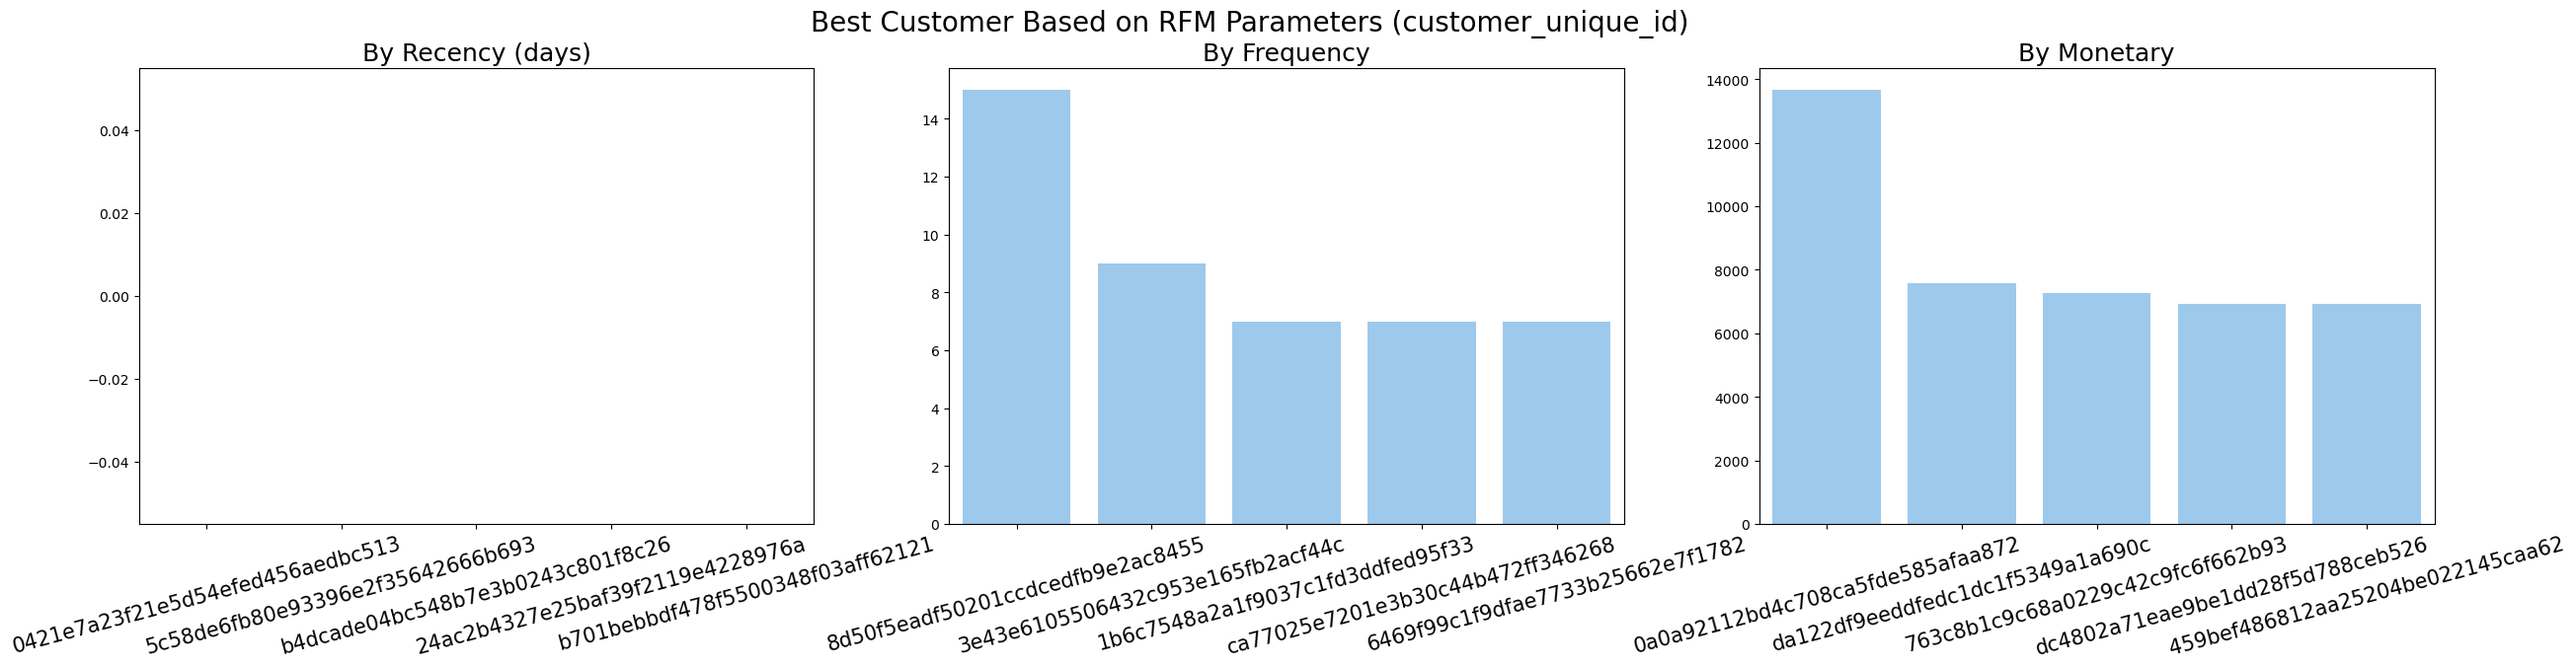

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), color="#90CAF9", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15, rotation=15)

sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), color="#90CAF9", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=15)

sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), color="#90CAF9", ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=20)
plt.savefig("images/top-customer.png")
plt.show()

#### Calculate RFM Score

In [106]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_unique_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,111,70946.0,45278.5,59241.5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,114,69984.5,45278.5,2027.5
2,0000f46a3911fa3c0805444483337064,1,86.22,537,3235.0,45278.5,36827.5
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,321,26666.5,45278.5,11436.5
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,288,31348.0,45278.5,72814.5


In [107]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_unique_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,111,75.998372,48.50038,63.456945
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,114,74.968399,48.50038,2.171771
2,0000f46a3911fa3c0805444483337064,1,86.22,537,3.465378,48.50038,39.448033
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,321,28.565537,48.50038,12.250287
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,288,33.580427,48.50038,77.995758


In [108]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)

rfm_df[['customer_unique_id', 'RFM_score']].head()

,customer_unique_id,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,3.06
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.30
2,0000f46a3911fa3c0805444483337064,1.83
3,0000f6ccb0745a6a4b88665a16c9f078,1.24
4,0004aac84e0df4da2b147fca70cf8255,3.15


In [109]:
# rfm_df.sort_values(by="RFM_score", inplace=True, ascending=False)
# rfm_df[['customer_unique_id', 'RFM_score']].head()

### Customer segmentation based on RFM_score

In [110]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_unique_id', 'RFM_score', 'customer_segment']].head(20)

,customer_unique_id,RFM_score,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,3.06,Medium value customer
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.30,lost customers
2,0000f46a3911fa3c0805444483337064,1.83,Low value customers
3,0000f6ccb0745a6a4b88665a16c9f078,1.24,lost customers
4,0004aac84e0df4da2b147fca70cf8255,3.15,Medium value customer
5,0004bd2a26a76fe21f786e4fbd80607f,3.21,Medium value customer
6,00050ab1314c0e55a6ca13cf7181fecf,1.40,lost customers
7,00053a61a98854899e70ed204dd4bafe,3.80,Medium value customer
8,0005e1862207bf6ccc02e4228effd9a0,2.59,Low value customers
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2.82,Low value customers


In [111]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_unique_id.nunique()
customer_segment_df.columns = ["customer_segment", "customer_count"]
customer_segment_df

,customer_segment,customer_count
0,High value customer,2620
1,Low value customers,44970
2,Medium value customer,27219
3,Top customers,511
4,lost customers,18037


In [112]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

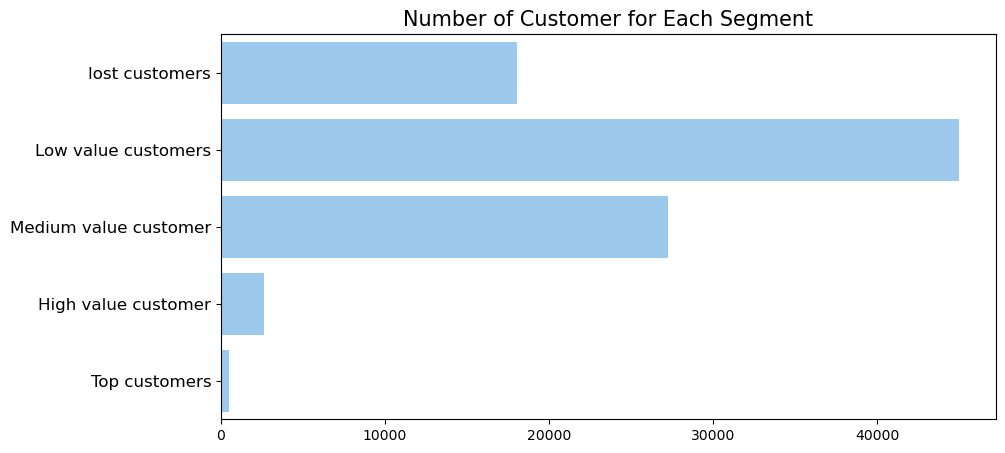

In [113]:
plt.figure(figsize=(10, 5))
colors_ = ["#90CAF9", "#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_count", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    color="#90CAF9"
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.savefig("images/customer-segmentation.png")
plt.show()